# _Pedicularis cranolopha_ Data Hack notebook
----------------   


### Notebook setup

In [1]:
## import Python modules
import numpy as np
import pymc as pm
import pandas as pd
from numpy import linalg as LA

## import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

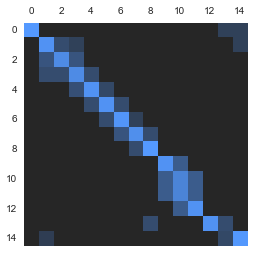

In [3]:
cranomig = np.array(
[[0.90, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.05, 0.05],
 [0.00, 0.80, 0.10, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.05],
 [0.00, 0.15, 0.70, 0.15, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.10, 0.10, 0.70, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.12, 0.80, 0.08, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.10, 0.80, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.10, 0.85, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.15, 0.75, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.10, 0.90, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.80, 0.20, 0.00, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.20, 0.60, 0.20, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.20, 0.60, 0.20, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.20, 0.80, 0.00, 0.00, 0.00],
 [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.10, 0.00, 0.00, 0.00, 0.80, 0.10, 0.00],
 [0.00, 0.04, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.08, 0.88]])

#for i in cranomig:
#    print i.sum()
    
### matrix of cranolopha migration matrix
#f, axes = plt.subplot(1,3,figsize=(12,4))
colors = sns.blend_palette(["#262626", "#5499ff"], as_cmap=True)

#plt.grid('off')
plt.matshow(np.sqrt(cranomig),cmap=colors)#, grid='off')
plt.grid('off')

plt.savefig("cranoEVOmigmat.svg")

## Community data

In [35]:
## read in communities for populations
comms = open("/home/deren/Documents/DataHack/sympatry_crano.txt").readlines()
comms = [i.split()[1:] for i in comms]

In [36]:
for i,j in enumerate(comms):
    print i+1,j

1 ['confertiflora', 'dichotoma', 'densispica', 'rex']
2 ['densispica', 'integrifolia', 'kansuensis']
3 ['kansuensis']
4 ['rex', 'verticillata']
5 ['rhinanthoides', 'rex', 'kansuensis']
6 ['rhinanthoides', 'integrifolia', 'polyodonta', 'kansuensis', 'densispica']
7 ['longiflora', 'densispica', 'rhinanthoides', 'polyodonta', 'kansuensis']
8 ['longiflora', 'densispica', 'rhinanthoides', 'kansuensis']
9 ['rhinanthoides', 'szetschuanica']
10 ['pseudomelampyriflora', 'kansuensis', 'lachnoglossa']
11 ['alaschanica', 'kansuensis']
12 ['oliveriana', 'alaschanica', 'longiflora', 'batangensis', 'kansuensis', 'polyodonta']
13 ['alaschanica', 'kansuensis', 'integrifolia']
14 ['longiflora', 'rhinanthoides', 'kansuensis', 'anas', 'szetschuanica']
15 ['rhinanthoides', 'longiflora', 'densispica', 'anas', 'kansuensis']
16 ['kansuensis', 'anas', 'pseudoingens', 'longiflora']
17 ['polyodonta', 'szetschuanica', 'cheilanthifolia']
18 ['longiflora', 'rhinanthoides', 'cheilanthifolia', 'szetschuanica', 'polyo

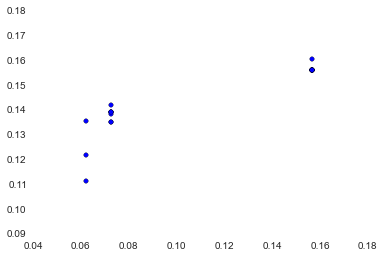

In [56]:
import ete2

## read in a tree to measure phylo distances 
tre = open("/home/deren/Documents/DataHack/pedicularis.ucln.trees").readlines()[0]
#tree = egg.Tree(string=tre.strip())
tree = ete2.Tree(tre)

## focal species node
crano = tree.get_leaves_by_name("cranolopha")[0]

## save distance measures
nn_phylo_dist = []
av_phylo_dist = []
for comm in comms:
    if "pseudoingens" in comm:
        comm.remove("pseudoingens")
        comm.append("ingens")
    
    dists = [tree.get_distance(crano,tree.get_leaves_by_name(x)[0]) for x in comm]
    nn_phylo_dist.append(min(dists))
    av_phylo_dist.append(np.mean(dists))
    
#print nn_phylo_dist
#print av_phylo_dist
plt.scatter(nn_phylo_dist,av_phylo_dist)

In [62]:
cranot = pd.read_csv("/home/deren/Documents/DataHack/comm_data.csv", index_col=0)

[42.62, 60.38, 69.52, 33.67, 27.87, 50.75, 41.0, 41.92, 40.81, 45.75, 60.41, 42.83, 51.3, 58.27, 44.77, 62.88, 74.32, 50.45, 44.26, 53.15, 33.94, 33.3, 42.76, 25.2, 54.41, 52.46]
[36.74, 43.04, 69.52, 26.17, 15.37, 35.15, 5.1, 9.54, 28.06, 40.41, 53.41, 8.16, 39.96, 22.37, 8.27, 25.63, 72.99, 15.45, 10.89, 53.15, 29.94, 0.72, 42.76, 1.36, 37.41, 17.21]


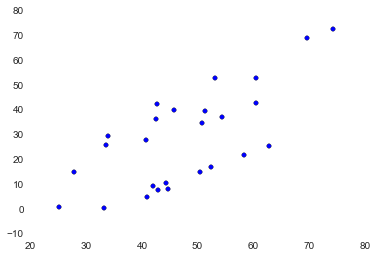

In [80]:
## read in species traits to create phenotypic distances
sptrait = pd.read_table("/home/deren/Documents/DataHack/sp_traits.txt", index_col=0)

## save distance measures
av_tube_dist = []
av_style_dist = []
nn_tube_dist = []
nn_style_dist = []
max_style_dist = []

for num,comm in enumerate(comms):
    if "pseudoingens" in comm:
        comm.remove("pseudoingens")
        comm.append("ingens")
    tubes = [abs(sptrait.meantube[i]-cranot.tube_length[num]) for i in comm]
    av_tube_dist.append(np.mean(tubes))
    nn_tube_dist.append(min(tubes))
    styles = [abs((sptrait.meanbeak[i]+sptrait.meantube[i])-\
                  (cranot.beak_length[num]+cranot.tube_length[num])) for i in comm]
    av_style_dist.append(np.mean(styles))
    nn_style_dist.append(min(styles))   
    max_style_dist.append(max([sptrait.meanbeak[i]+sptrait.meantube[i] \
                              for i in comm]))

print [round(i,2) for i in av_style_dist]
print [round(i,2) for i in nn_style_dist]
plt.scatter(av_style_dist,nn_style_dist)

In [82]:
traitsdat = pd.DataFrame([max_style_dist,av_style_dist,nn_style_dist]).T
traitsdat.columns = ["comm.maxstyle","comm.avstyledist","comm.nnstyledist"]
traitsdat.to_csv("/home/deren/Documents/DataHack/traitscalccomm.csv",
                float_format="%.4f")